In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cat vs Dog Dataset 


In [2]:
import cv2 as cv
import numpy as np

In [3]:
from matplotlib import pyplot as plt
from cv2 import imshow as ims

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import sklearn
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , Flatten, MaxPooling2D
from keras.layers import BatchNormalization
from keras.datasets import mnist
import cv2 
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation
from keras.regularizers import l2
from PIL import Image

In [5]:
def plot(model_history, plot_type):
    val_type = "val_"+plot_type
    plt.plot(model_history.history[plot_type])
    plt.plot(model_history.history[val_type])
    plt.title(plot_type + ' Plot')
    plt.xlabel('Epoch')
    plt.ylabel(val_type)
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',monitor='val_accuracy', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    # Specify any desired data augmentation or preprocessing options here
    # For example, you can use rescale to normalize pixel values
    
    rescale=200
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),  # Specify the desired image size
    batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
    subset='training'  # Specify 'training' to load the training set
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(200, 200),  # Specify the desired image size
    batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
    subset='training'  # Specify 'validation' to load the testing set
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()


Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [8]:
#x_train = x_train[:1073]
#x_test = x_test[:462]
#y_train = y_train[:1073]
#y_test = y_test[:462]
n_classes = 3
#y_train = np_utils.to_categorical(y_train, n_classes)
#y_test = np_utils.to_categorical(y_test, n_classes)

In [9]:
y_test[1]
y_test.shape

(32, 3)

In [10]:
model1 = Sequential()
model1.add(Conv2D(64, kernel_size = 5,input_shape=(200,200,3) ,activation = 'relu',padding="Same"))
model1.add(BatchNormalization())
#model1.add(Dropout(rate=0.2))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model1.add(BatchNormalization())
#model1.add(Dropout(rate=0.2))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size = 3,activation = 'relu',padding="Same"))
model1.add(Flatten())
model1.add(Dense(128, activation= 'sigmoid',kernel_regularizer=l2(l=0.005)))
model1.add(Dense(128, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model1.add(Dense(n_classes, activation = 'softmax'))

model1.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model1.summary()

model1_history = model1.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

1/1 - 0s - loss: 3.7119 - accuracy: 0.3750 - 64ms/epoch - 64ms/step
Train Loss 3.711945056915283
Train Accuracy 0.375
1/1 - 0s - loss: 3.6636 - accuracy: 0.3750 - 52ms/epoch - 52ms/step
Test Loss 3.663567066192627
Test Accuracy 0.375


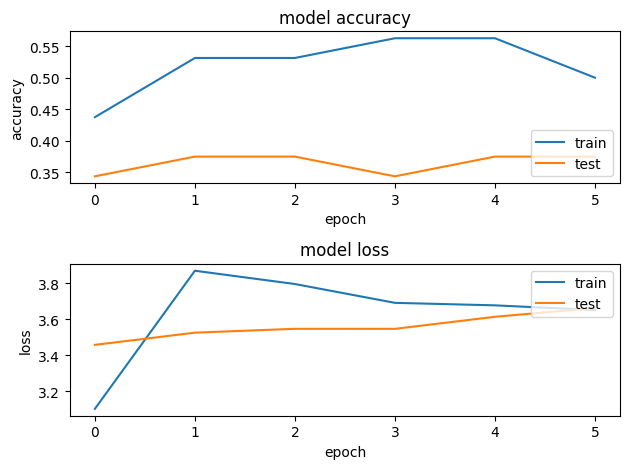

In [11]:
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model1_history.history['loss'])
plt.plot(model1_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

## Model 2 : since the model 1 was too shallow and did not give optimum results 
### Increasing the depth of the model futher 

In [12]:
model2 = Sequential()

## Block 1
model2.add(Conv2D(64, kernel_size = 5,input_shape=(200,200,3) ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

## Block 2
model2.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

## Block 3
model2.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 4
model2.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 5
model2.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

## Block 6
model2.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

## Fully Connected 
model2.add(Flatten())
model2.add(Dense(128, activation= 'sigmoid',kernel_regularizer=l2(l=0.005)))
model2.add(Dense(128, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model2.add(Dense(n_classes, activation = 'softmax'))

model2.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model2.summary()

model2_history = model2.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 64)      4864      
                                                                 
 conv2d_4 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 64)      36928     
                                                                 
 batch_normalization_2 (Batc  (None, 200, 200, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 128)    

1/1 - 0s - loss: 1.9037 - accuracy: 0.7188 - 125ms/epoch - 125ms/step
Train Loss 1.9037384986877441
Train Accuracy 0.71875
1/1 - 0s - loss: 3.2845 - accuracy: 0.2188 - 124ms/epoch - 124ms/step
Test Loss 3.284506320953369
Test Accuracy 0.21875


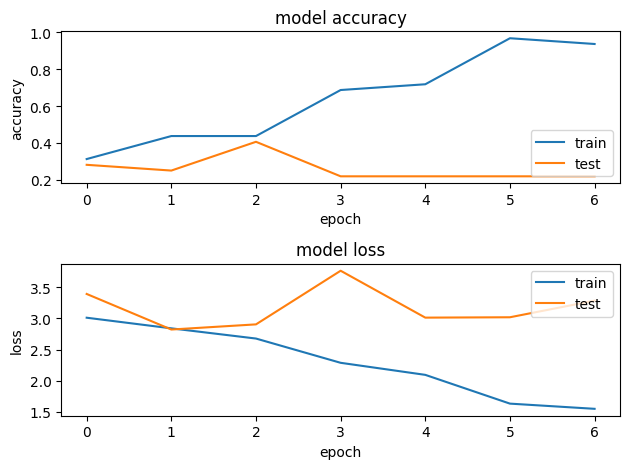

In [13]:
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

### With data autmentation 

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(200, 200),  # Specify the desired image size
    batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(200, 200),  # Specify the desired image size
    batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()


Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [15]:
from keras.utils import np_utils
x_train = x_train[:2332]
x_test = x_test[:441]
y_train = y_train[:2332]
y_test = y_test[:441]
#y_train = y_train.reshape(-1).astype(int)
#y_test = y_test.reshape(-1).astype(int)

n_classes = 3
y_test[1:40]
#y_train = np_utils.to_categorical(y_train, 3)
#y_test = np_utils.to_categorical(y_test, 3)

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [16]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(32, 3)
(32, 200, 200, 3)
(32, 3)
(32, 200, 200, 3)


In [17]:
model3 = Sequential()

## Block 1
model3.add(Conv2D(64, kernel_size = 5,input_shape=(200,200,3) ,activation = 'relu',padding="Same"))
model3.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

## Block 2
model3.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

## Block 3
model3.add(Conv2D(256, kernel_size = 3,activation = 'relu',padding="Same"))
model3.add(Conv2D(256, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(256, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 4
model3.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 5
model3.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

## Block 6
model3.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))
model3.add(Conv2D(128, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Fully Connected 
model3.add(Flatten())
model3.add(Dense(512, activation= 'relu',kernel_regularizer=l2(l=0.005)))
model3.add(Dense(512, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model3.add(Dense(n_classes, activation = 'softmax'))

model3.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

model3_history = model3.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 conv2d_22 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 conv2d_23 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 batch_normalization_4 (Batc  (None, 200, 200, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 100, 100, 128)    

1/1 - 0s - loss: 7.6182 - accuracy: 0.3750 - 163ms/epoch - 163ms/step
Train Loss 7.618175029754639
Train Accuracy 0.375
1/1 - 0s - loss: 9.4909 - accuracy: 0.2812 - 162ms/epoch - 162ms/step
Test Loss 9.490874290466309
Test Accuracy 0.28125


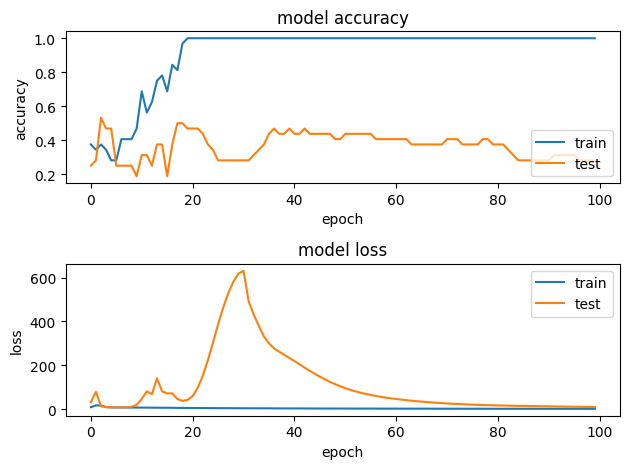

In [18]:
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model3_history.history['loss'])
plt.plot(model3_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

### With 14 different iterations of changing the values of models dataset etc, I officially give up on training CNN for my custom data set.

## Transfer learning using Darknet model trained on Imagenet dataset 

In [19]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
# Load the pre-trained Darknet model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(224, 224),  # Specify the desired image size
    #batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()


Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [21]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(32, 3)
(32, 224, 224, 3)
(32, 3)
(32, 224, 224, 3)


In [22]:
model4 = Sequential()
model4.add(densenet_model)
model4.add(GlobalAveragePooling2D())
model4.add(Dense(256, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.summary()

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4_history = model4.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=my_callbacks)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 256)               262400    
                                                                 
 dense_10 (Dense)            (None, 3)                 771       
                                                                 
Total params: 7,300,675
Trainable params: 7,217,027
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 83s 83s/step - loss: 1.6288 - accuracy: 0.3750 - val_lo

1/1 - 0s - loss: 5.2356 - accuracy: 0.4375 - 117ms/epoch - 117ms/step
Train Loss 5.235584259033203
Train Accuracy 0.4375
1/1 - 0s - loss: 14.5381 - accuracy: 0.2188 - 118ms/epoch - 118ms/step
Test Loss 14.53807258605957
Test Accuracy 0.21875


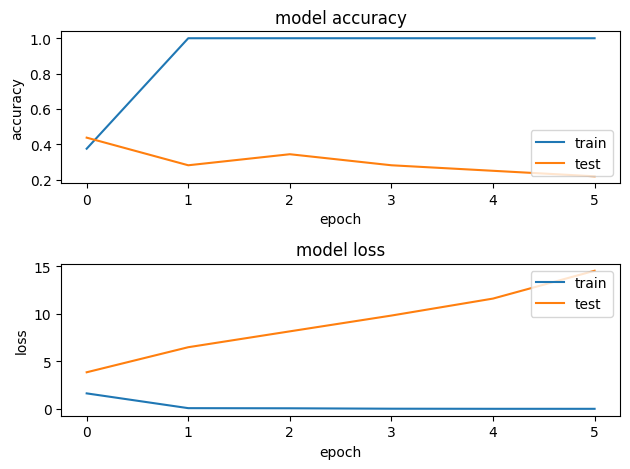

In [23]:
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model4_history.history['loss'])
plt.plot(model4_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

### What if I give Train data as test and Test data as train, what diff would it make ?

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdogtest/"
dataset_test = "/content/drive/My Drive/catvsdog/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(224, 224),  # Specify the desired image size
    #batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

Found 441 images belonging to 3 classes.
Found 2332 images belonging to 3 classes.


In [25]:
model5 = Sequential()
model5.add(densenet_model)
model5.add(GlobalAveragePooling2D())
model5.add(Dense(256, activation= 'relu',kernel_regularizer=l2(l=0.005)))
model5.add(Dense(256, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.summary()

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5_history = model5.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=my_callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_11 (Dense)            (None, 256)               262400    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 3)                 771       
                                                                 
Total params: 7,366,467
Trainable params: 7,282,819
Non-trainable params: 83,648
_______________________________________

1/1 - 0s - loss: 5.3422 - accuracy: 0.4062 - 139ms/epoch - 139ms/step
Train Loss 5.342167377471924
Train Accuracy 0.40625
1/1 - 0s - loss: 6.1285 - accuracy: 0.4062 - 130ms/epoch - 130ms/step
Test Loss 6.128539085388184
Test Accuracy 0.40625


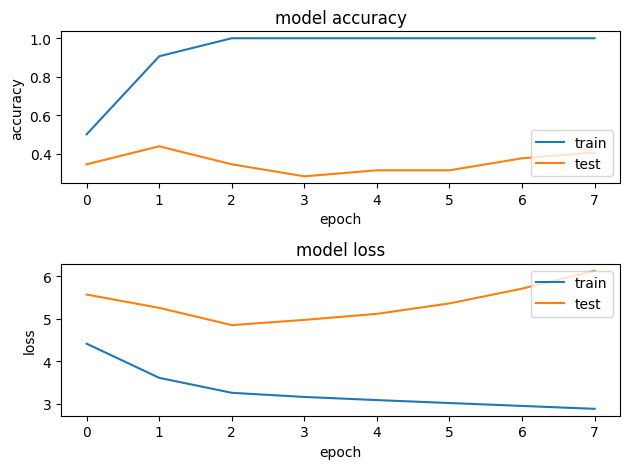

In [26]:
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model5_history.history['loss'])
plt.plot(model5_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


In [27]:
### Successfully proved that the dataset i have made is very bad xD

Converting images to greyscale and running through cnn

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   preprocessing_function=lambda x: tf.image.rgb_to_grayscale(x) 

)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(400, 400),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(400, 400),  # Specify the desired image size
    #batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()


Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [29]:

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (32, 400, 400, 3)
Training labels shape: (32, 3)
Testing data shape: (32, 400, 400, 3)
Testing labels shape: (32, 3)


In [30]:
model6 = Sequential()

## Block 1
model6.add(Conv2D(64, kernel_size = 5,input_shape=(400,400,3) ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))

## Block 2
model6.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))

## Block 3
model6.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 4
model6.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))

## Block 5
model6.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(MaxPooling2D(pool_size=(2, 2)))

## Block 6
model6.add(Conv2D(128, kernel_size = 3,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(Conv2D(64, kernel_size = 3 ,activation = 'relu',padding="Same"))
model6.add(MaxPooling2D(pool_size=(2, 2)))

## Fully Connected 
model6.add(Flatten())
model6.add(Dense(128, activation= 'sigmoid',kernel_regularizer=l2(l=0.005)))
model6.add(Dense(128, activation = 'relu', kernel_regularizer=l2(l=0.005)))
model6.add(Dense(n_classes, activation = 'softmax'))

model6.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model6.summary()

model6_history = model6.fit(x_train, y_train, epochs=100, validation_data= (x_test, y_test), callbacks=my_callbacks)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 400, 400, 64)      4864      
                                                                 
 conv2d_40 (Conv2D)          (None, 400, 400, 64)      36928     
                                                                 
 conv2d_41 (Conv2D)          (None, 400, 400, 64)      36928     
                                                                 
 batch_normalization_7 (Batc  (None, 400, 400, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 200, 200, 64)     0         
 2D)                                                             
                                                                 
 conv2d_42 (Conv2D)          (None, 200, 200, 128)    

1/1 - 0s - loss: 2.7933 - accuracy: 0.4062 - 390ms/epoch - 390ms/step
Train Loss 2.793285369873047
Train Accuracy 0.40625
1/1 - 0s - loss: 3.1901 - accuracy: 0.3125 - 396ms/epoch - 396ms/step
Test Loss 3.190145254135132
Test Accuracy 0.3125


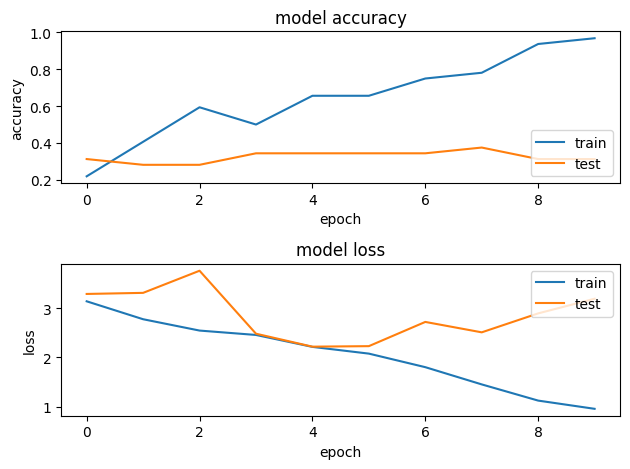

In [31]:
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model6_history.history['accuracy'])
plt.plot(model6_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model6_history.history['loss'])
plt.plot(model6_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

### Model 7 : Transfer learning Using alexnet 

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(224, 224),  # Specify the desired image size
    #batch_size=32,  # Specify the batch size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.


In [34]:
from tensorflow.keras.applications import DenseNet121
# Load the pre-trained DenseNet121 model
densenet_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model7 = Sequential()

model7.add(densenet_model)# Add the pre-trained DenseNet model to the Sequential model
model7.add(GlobalAveragePooling2D())

# Add a fully connected layer with 256 units and ReLU activation
model7.add(Dense(256, activation='relu'))
model7.add(Dense(3, activation='softmax'))
model7.summary()

# Compile the model
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model7_history = model7.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=my_callbacks)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_17 (Dense)            (None, 256)               262400    
                                                                 
 dense_18 (Dense)            (None, 3)                 771       
                                                                 
Total params: 7,300,675
Trainable params: 7,217,027
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/10
1/1 [==============================] - 72s 72s/step - loss: 1.6643 - accuracy: 0.1875 - val_lo

1/1 - 0s - loss: 10.2530 - accuracy: 0.4062 - 152ms/epoch - 152ms/step
Train Loss 10.252996444702148
Train Accuracy 0.40625
1/1 - 0s - loss: 12.5861 - accuracy: 0.3438 - 135ms/epoch - 135ms/step
Test Loss 12.586051940917969
Test Accuracy 0.34375


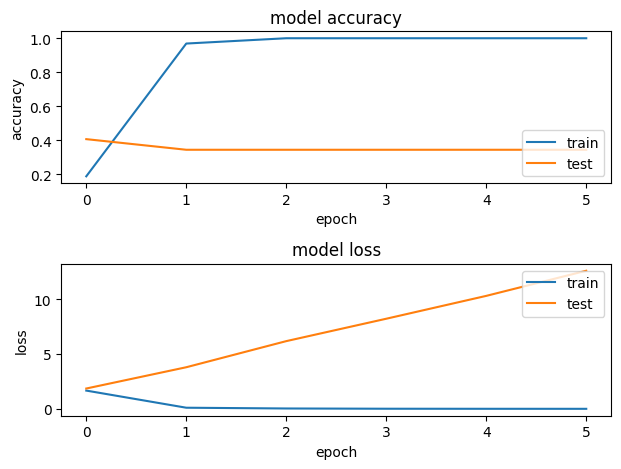

In [35]:
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model7_history.history['accuracy'])
plt.plot(model7_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model7_history.history['loss'])
plt.plot(model7_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Alexnet did better than any other model till now 

### Model 8 : Using Resnet

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the images
dataset_path = "/content/drive/My Drive/catvsdog/"
dataset_test = "/content/drive/My Drive/catvsdogtest/"

# Create an ImageDataGenerator instance and specify the data augmentation or preprocessing options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the training dataset from the specified directory
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Load the testing dataset from the specified directory
test_generator = datagen.flow_from_directory(
    dataset_test,
    target_size=(224, 224),  # Specify the desired image size
    class_mode='categorical',  # Specify the type of labels (e.g., categorical for multiple classes)
)

# Retrieve the loaded data and labels
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Found 2332 images belonging to 3 classes.
Found 441 images belonging to 3 classes.
Training data shape: (32, 224, 224, 3)
Training labels shape: (32, 3)
Testing data shape: (32, 224, 224, 3)
Testing labels shape: (32, 3)


In [42]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [49]:
model8 = Sequential()

model8.add(resnet_model)# Add the pre-trained resnet model to the Sequential model
model8.add(GlobalAveragePooling2D())

# Add a fully connected layer with 256 units and ReLU activation
model8.add(Dense(256, activation='relu'))
model8.add(Dense(3, activation='softmax'))
model8.summary()

# Compile the model
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model8_history = model8.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test))


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_29 (Dense)            (None, 256)               524544    
                                                                 
 dense_30 (Dense)            (None, 3)                 771       
                                                                 
Total params: 24,113,027
Trainable params: 24,059,907
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 43s 43s/step - loss: 1.2082 - accuracy: 0.5000 - val

1/1 - 0s - loss: 316.1318 - accuracy: 0.3438 - 145ms/epoch - 145ms/step
Train Loss 316.13177490234375
Train Accuracy 0.34375
1/1 - 0s - loss: 308.9340 - accuracy: 0.2812 - 131ms/epoch - 131ms/step
Test Loss 308.93402099609375
Test Accuracy 0.28125


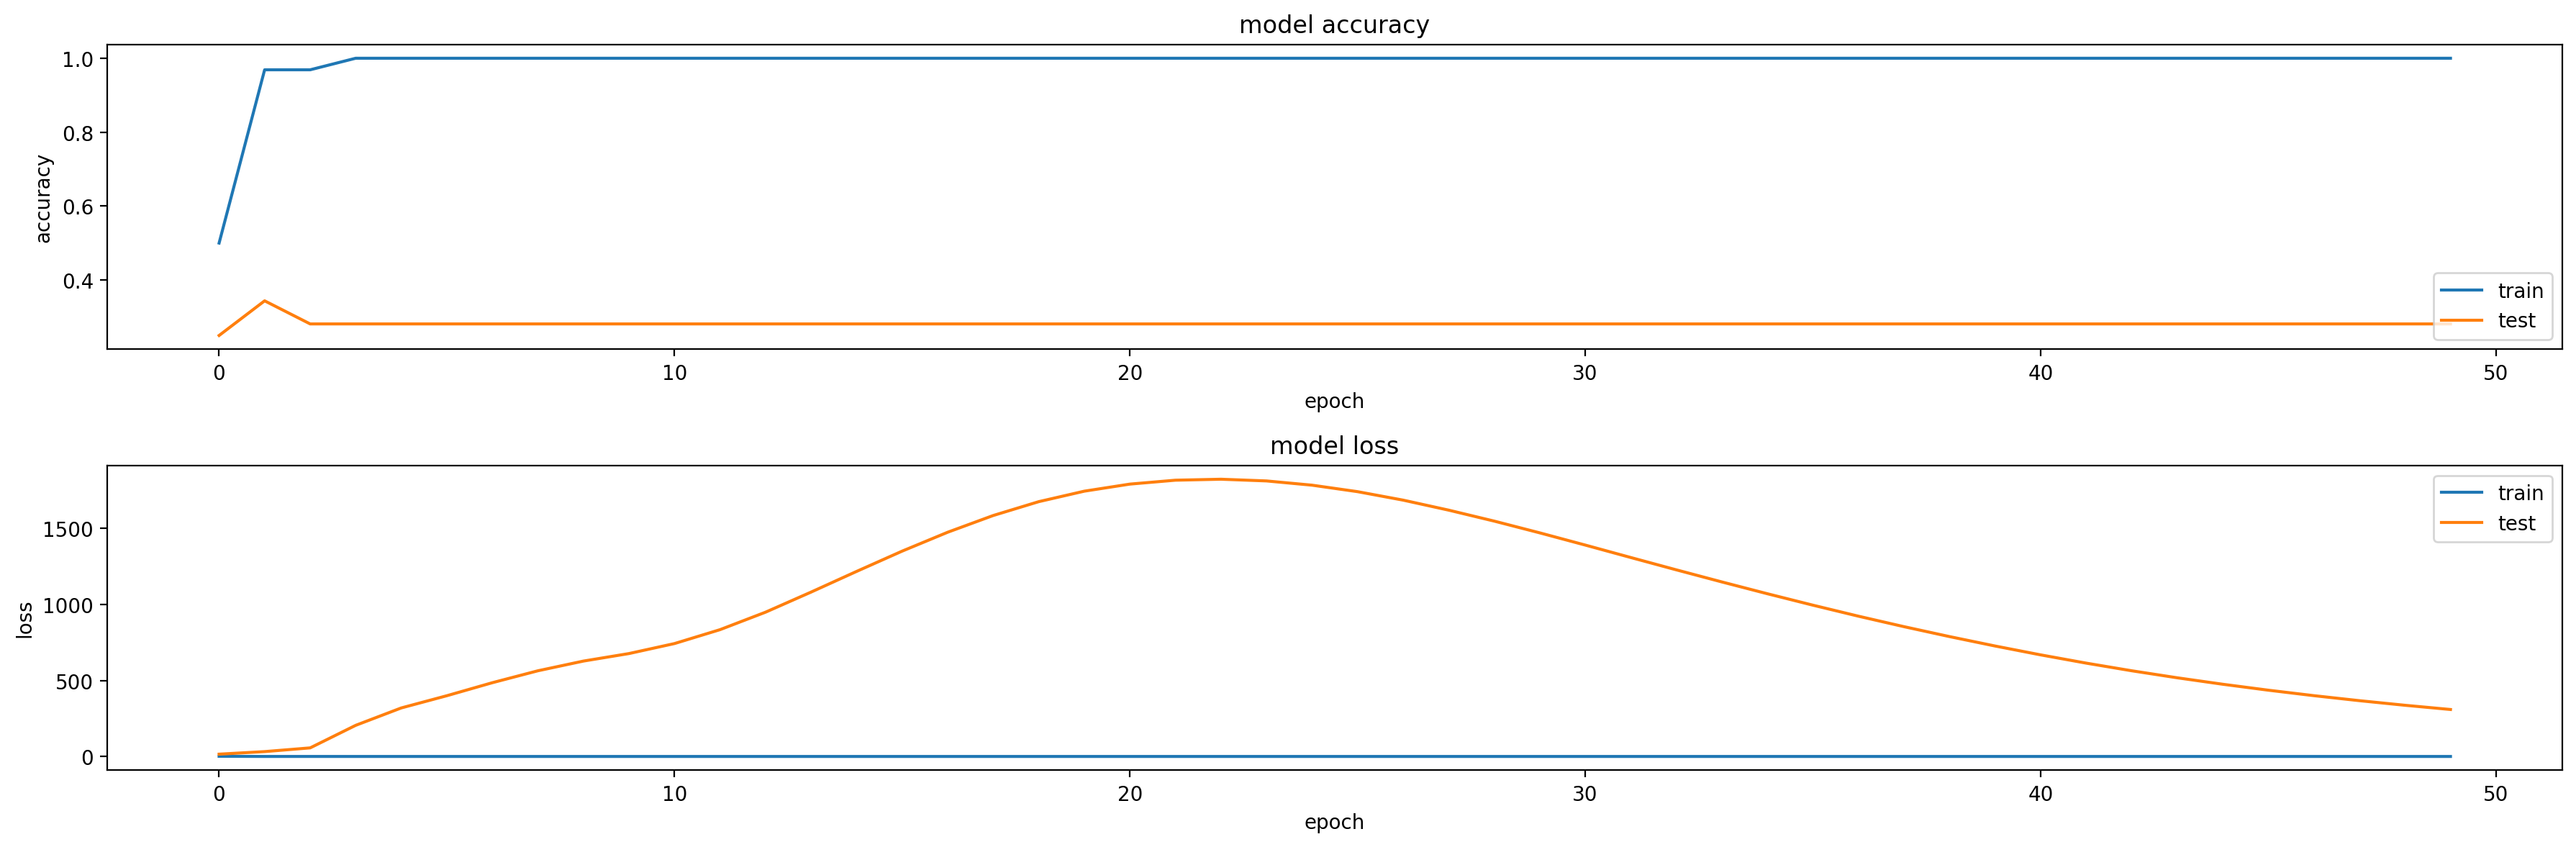

In [50]:
loss, accuracy  = model8.evaluate(x_test, y_test, verbose=False)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model8_history.history['accuracy'])
plt.plot(model8_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model8_history.history['loss'])
plt.plot(model8_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

loss_and_metrics = model8.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

loss_and_metrics = model8.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

###  Resnet not ideal in this case 

With multiple models all maxing out at 0.6 accuracy, we can conclude that the Training data is not enough with respect to the computing power possesed by the system. 1000-1500 images are required per class to successfully classify the images between cats, dogs and neither. 